##Task 4 - To Explore Decision Tree Algorithm
For the given ‘Iris’ dataset, create the Decision Tree classifier and
visualize it graphically. The purpose is if we feed any new data to this
classifier, it would be able to predict the right class accordingly.

##Importing Libraries

In [ ]:
import pandas as pd
import numpy as np  
import seaborn as sns
# Install required libraries
!pip install pydotplus
from sklearn import metrics
!apt-get install graphviz -y
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import os # accessing directory structure
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.svm import LinearSVC, SVC
from pandas.plotting import scatter_matrix
import sklearn.datasets as datasets
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings("ignore")

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


##Cleaning the dataset

It’s a necessary step to clean the data in its pre-processing stage. For strings, therefore, we define a function for attaining the same.

In [ ]:
def clean_str(string):
    string = re.sub(r"\n", "", string)
    string = re.sub(r"\r", "", string)
    string = re.sub(r"[0-9]", "digit", string)
    string = re.sub(r"\'", "", string)
    string = re.sub(r"\"", "", string)
    
    return string.strip().lower()

##Reading CSV Dataset

In [ ]:
from sklearn.datasets import load_iris
data = load_iris()
df = pd.DataFrame(np.column_stack((data.data, data.target)), columns = data.feature_names+['target'])
df.head(10)
df1=df

Adding Label for Species

In [ ]:
df1['label'] = df1.target.replace(dict(enumerate(data.target_names)))
y1=data.target

In [ ]:
df1.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,label
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa
5,5.4,3.9,1.7,0.4,0.0,setosa
6,4.6,3.4,1.4,0.3,0.0,setosa
7,5.0,3.4,1.5,0.2,0.0,setosa
8,4.4,2.9,1.4,0.2,0.0,setosa
9,4.9,3.1,1.5,0.1,0.0,setosa


In [ ]:
df1.tail(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,label
140,6.7,3.1,5.6,2.4,2.0,virginica
141,6.9,3.1,5.1,2.3,2.0,virginica
142,5.8,2.7,5.1,1.9,2.0,virginica
143,6.8,3.2,5.9,2.3,2.0,virginica
144,6.7,3.3,5.7,2.5,2.0,virginica
145,6.7,3.0,5.2,2.3,2.0,virginica
146,6.3,2.5,5.0,1.9,2.0,virginica
147,6.5,3.0,5.2,2.0,2.0,virginica
148,6.2,3.4,5.4,2.3,2.0,virginica
149,5.9,3.0,5.1,1.8,2.0,virginica


##Getting information about dataset

In [ ]:
df.info()
nRowsRead = 'None'
df.dataframeName = 'dataset.csv'
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    float64
 5   label              150 non-null    object 
dtypes: float64(5), object(1)
memory usage: 7.2+ KB
There are 150 rows and 6 columns


In [ ]:
df.describe()
print('Dataset Lenght:: ', len(df))
print('Dataset Shape:: ', df.shape)

Dataset Lenght::  150
Dataset Shape::  (150, 6)


Count of leaves belonging to a species. This will give us an idea for species distribution.

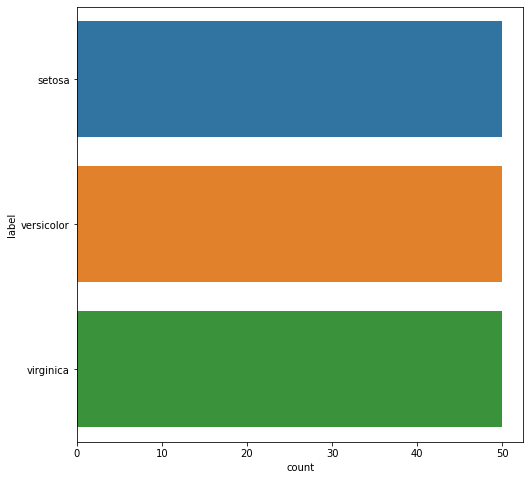

In [ ]:
sns.countplot(y="label", data=df)

Species distribution plot



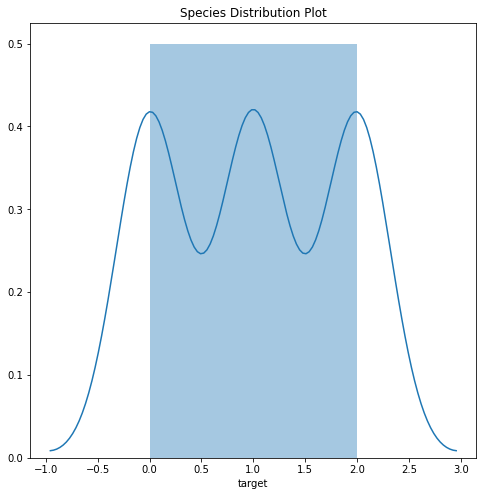

In [ ]:
plt.figure(figsize=(8,8))
plt.title('Species Distribution Plot')
sns.distplot(df['target'])

##Finding and Filling NULL values.

Calculating the Missing Values % contribution in DF


In [ ]:
df_null = df.isna().mean().round(4) * 100

df_null.sort_values(ascending=False).head()

label                0.0
target               0.0
petal width (cm)     0.0
petal length (cm)    0.0
sepal width (cm)     0.0
dtype: float64

In [ ]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
label                0
dtype: int64

In [ ]:
df = df.fillna(method = 'bfill')#Filling of NULL values using backfilling
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
label                0
dtype: int64

##Outlier Analysis

We may run an analysis for outliers for maximum contribution to inconsistency.

Text(0.5, 0, 'Continuous Variable')

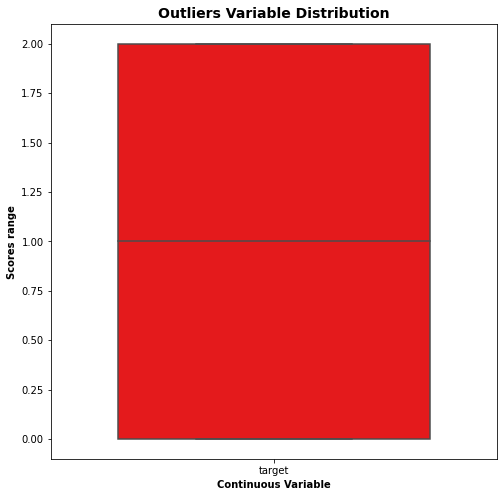

In [ ]:
outliers = ['target']
plt.rcParams['figure.figsize'] = [8,8]
sns.boxplot(data=df[outliers], orient='v', palette='Set1' ,whis=1.5,saturation=1, width=0.7)
plt.title('Outliers Variable Distribution', fontsize = 14, fontweight = 'bold')
plt.ylabel('Scores range', fontweight = 'bold')
plt.xlabel('Continuous Variable', fontweight = 'bold')

##Visual Plotting of Dataset for distribution of species

**Pairplot of all the numeric variables**


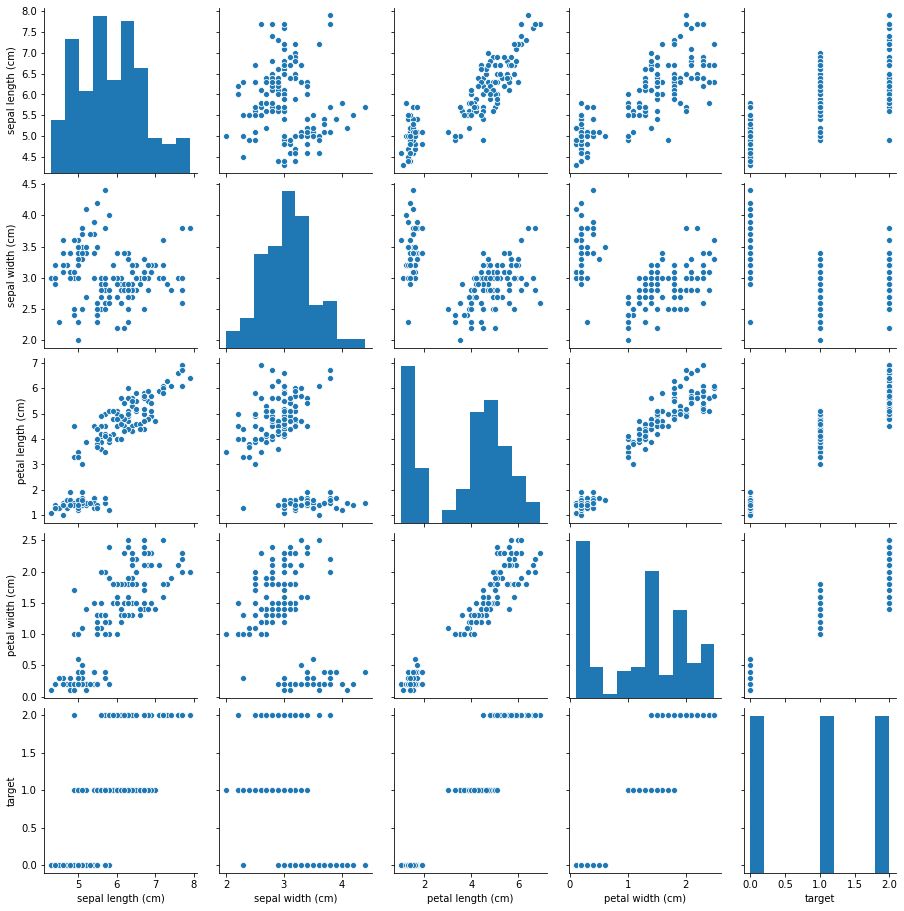

In [ ]:
sns.pairplot(df)

HeatMap

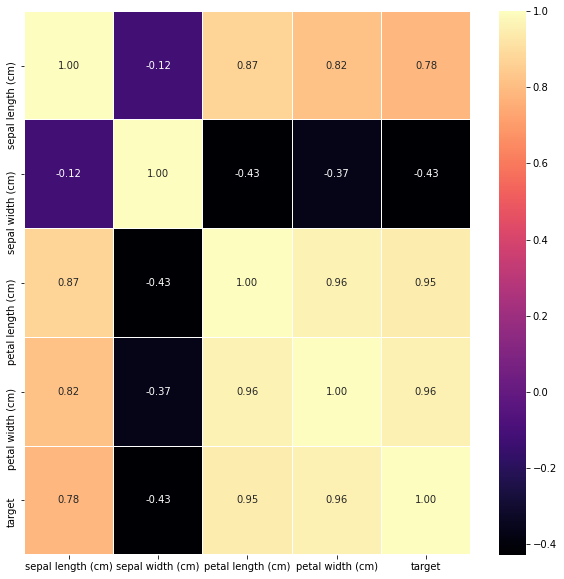

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(),ax=ax,annot=True,linewidth=0.05,fmt='.2f',cmap='magma')
plt.show()

##Train and Test data Splitting

In [ ]:
X = df.drop(['target', 'label'],axis=1)
y = df['target'] 
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.25, random_state=0) 

Shape of training sets

In [ ]:
print(X_train.shape)
print(y_train.shape)

(112, 4)
(112,)


Shape of testing sets

In [ ]:
print(X_test.shape)
print(y_test.shape)

(38, 4)
(38,)


##Decision Tree Training

Defining Decision Tree classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
regressor = DecisionTreeClassifier(criterion='entropy', max_depth=4)
regressor.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Chart representation of a decison tree(gini values)*italicized text*

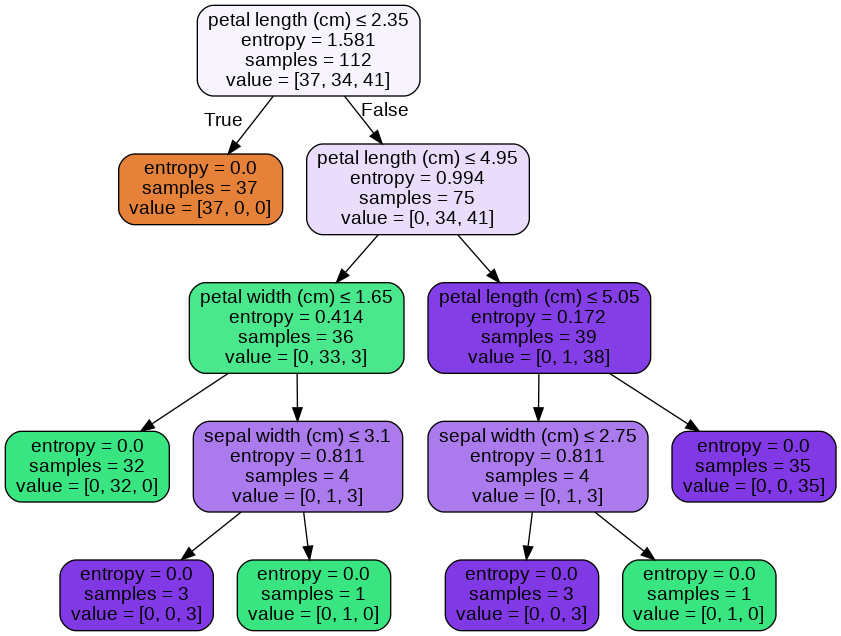

In [ ]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

# Visualize the graph
dot_data = StringIO()
export_graphviz(regressor, out_file=dot_data, feature_names=data.feature_names,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

##Predictive analysis

In [ ]:
y_predicted = regressor.predict(X_test)
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_predicted})  
df1.head(10)

,Actual,Predicted
114,2.0,2.0
62,1.0,1.0
33,0.0,0.0
107,2.0,2.0
7,0.0,0.0
100,2.0,2.0
40,0.0,0.0
86,1.0,1.0
76,1.0,1.0
71,1.0,1.0


##Evaluation Metrics

Mean squared error, R2 score and Mean absolute error. 

In [ ]:
mse = mean_squared_error(y_test, y_predicted)
r = r2_score(y_test, y_predicted)
mae = mean_absolute_error(y_test,y_predicted)
print("Mean Squared Error:",mse)
print("R score:",r)
print("Mean Absolute Error:",mae)

Mean Squared Error: 0.02631578947368421
R score: 0.9536585365853658
Mean Absolute Error: 0.02631578947368421


Accuracy Metrics

In [ ]:
print('Accuracy',metrics.accuracy_score(y_test, y_predicted))

Accuracy 0.9736842105263158


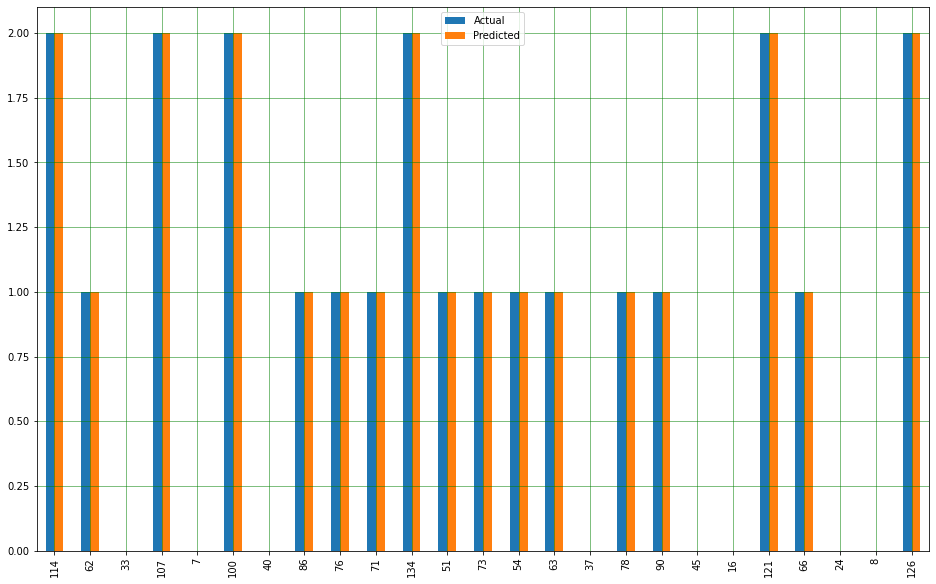

In [ ]:
df1 = df1.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()